In [52]:
import pandas as pd

# Import database from excel sheet. It is organized in columns [variable | unit | symbol | value]
# You can set index col (you can take symbol for cleaner formulas)
# df = pd.read_excel("../../database/ml_projekty.xlsx", sheet_name="Base", index_col="index", skiprows=1)

# to get value us df.at[<index>, "value"]

df8 = pd.read_excel("../../database/ml_projekty.xlsx", sheet_name="Base_pr8", index_col="index")
df8 = df8[17:36]
plane_prop= pd.read_csv("../../database/plane_properties.csv", index_col="Variable")
# display(df.head(10))
df8.columns

# plane_prop[""]


Index(['alpha', 'cz', 'c'x_p', 'a_p [deg]', 'Cmk', 'Cmp1', 'Cmp2', 'Cmp3',
       'Cmbu1', 'Cmbu2', 'Cmbu3'],
      dtype='object')

In [53]:

def get_prop(variable:str)->float: 
    return float(plane_prop.at[variable, "Value"])

# delta_h [rad]
def delta_h(Cmbu, kappa, cz):
    a2 = get_prop("a2")
    a1 = get_prop("a1")
    a = get_prop("a")
    # a = 3.5
    deps_dalpha = get_prop("deps_dalpha")
    azh2 = get_prop("azh_2")
    
    mydict={
        "a1":a2,
        "a2":a1,
        "a":a,
        "deps_dalpha":deps_dalpha,
        "azh2":azh2,
    }
    
    # print(Cmbu, mydict)
    

    return Cmbu/(kappa*a2)-a1/a2*(cz/a*(1-deps_dalpha)+ azh2)

def get_cz(V:float)->float:
    
    mass=get_prop("mtow") - 50
    g = 9.81
    rho = 1.225
    S = get_prop("S")
    
    return mass*g/(1/2*rho*V**2*S)

In [54]:
deltas = ["delta_h1","delta_h2","delta_h3"]
kappas = ["kh_1","kh_2","kh_3"]
azhs = ["azh_1","azh_2","azh_3"]
cmbus = ["cmbu1","cmbu2","cmbu3"]
xc = []

In [55]:

for delta, kappa, cmbu in zip(deltas, kappas, cmbus):
    # print(get_prop(cmbu), get_prop(kappa))
    for i, row in df8.iterrows():
        # get_prop(cmbu), get_prop(kappa), get_prop(azh)
        # print(delta, kappa, azh, cmbu)
        df8.at[i, delta] = delta_h(get_prop(cmbu), get_prop(kappa),  df8.at[i, "cz"])

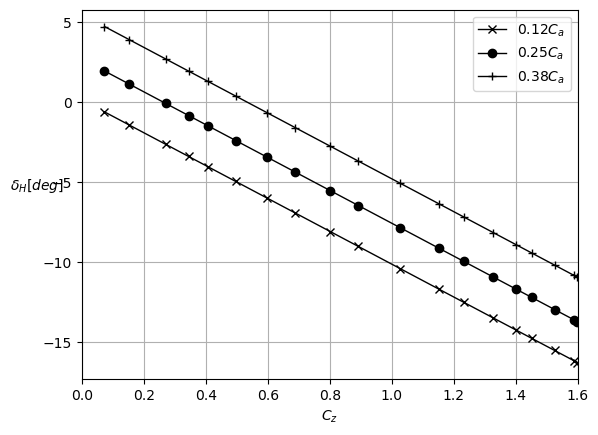

In [56]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.plot(df8['cz'], df8["delta_h1"]*180/3.14, label = "$0.12 C_a$",color = "black", marker = "x", linewidth = 1)
ax.plot(df8['cz'], df8["delta_h2"]*180/3.14, label = "$0.25 C_a$",color = "black", marker = "o", linewidth = 1)
ax.plot(df8['cz'], df8["delta_h3"]*180/3.14, label = "$0.38 C_a$",color = "black", marker = "+", linewidth = 1)

# ax.set_title()
ax.set_xlabel("$C_z$")
ax.set_ylabel("$\delta_H [deg$]", rotation = 0) 
ax.grid(True)
ax.legend()
ax.set_xlim([0, 1.6])

plt.savefig("../latex_raport/imgs/delta_h_cz.jpg", dpi=200)

$\delta_h (V)$  $,V \in (24, 54) ms^{-1}$


In [57]:
import numpy as np
# velocity range
vel_range = np.arange(24, 54, 1)
# cz range depending on velocity
cz_vel = [get_cz(v) for v in vel_range]

# delta_h values
delta_h_v = pd.DataFrame()
delta_h_v["vel"] = vel_range
delta_h_v["cz"] = cz_vel
# delta_h_v[""]


In [58]:

for delta, kappa, cmbu in zip(deltas, kappas, cmbus):
    # print(get_prop(cmbu), get_prop(kappa))
    for i, cz_val in enumerate(cz_vel):
        # get_prop(cmbu), get_prop(kappa), get_prop(azh)
        # print(delta, kappa, azh, cmbu)
        delta_h_v.at[i, delta] = delta_h(get_prop(cmbu), get_prop(kappa),  cz_val)

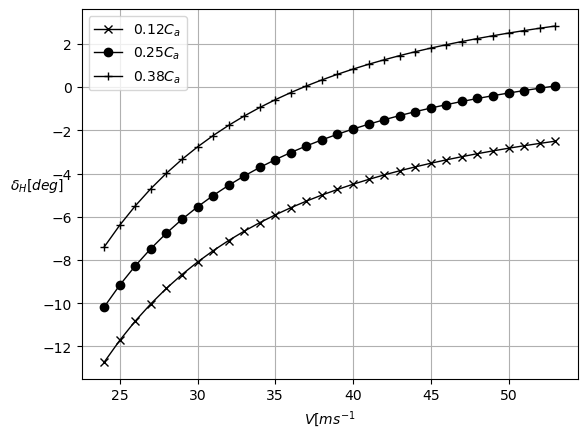

In [59]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.plot(delta_h_v["vel"], delta_h_v["delta_h1"]*180/3.14, label = "$0.12 C_a$",color = "black", marker = "x", linewidth = 1)
ax.plot(delta_h_v["vel"], delta_h_v["delta_h2"]*180/3.14, label = "$0.25 C_a$",color = "black", marker = "o", linewidth = 1)
ax.plot(delta_h_v["vel"], delta_h_v["delta_h3"]*180/3.14, label = "$0.38 C_a$",color = "black", marker = "+", linewidth = 1)

# ax.set_title()
ax.set_xlabel("$V[ms^{-1}$")
ax.set_ylabel("$\delta_H [deg$]", rotation = 0) 
ax.grid(True)
ax.legend()
# ax.set_xlim([0, 1.6])

plt.savefig("../latex_raport/imgs/delta_h_v.jpg", dpi = 200)

In [60]:
f = open("../output/delta_h_v_table.txt", "w")
delta_h_v_deg = delta_h_v
delta_h_v_deg["delta_h1"] = delta_h_v["delta_h1"]*180/3.14
delta_h_v_deg["delta_h2"] = delta_h_v["delta_h2"]*180/3.14
delta_h_v_deg["delta_h3"] = delta_h_v["delta_h3"]*180/3.14
delta_h_v_deg= delta_h_v_deg.set_index("vel")
f.write(delta_h_v_deg.to_latex())
f.close()

C:\Users\marek\AppData\Local\Temp\ipykernel_12004\943143854.py:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(delta_h_v_deg.to_latex())


In [61]:
delta_h_v_deg

,cz,delta_h1,delta_h2,delta_h3
vel,,,,
24,1.253129,-12.720390,-10.166218,-7.391849
25,1.154884,-11.712590,-9.158418,-6.384049
26,1.067755,-10.818822,-8.264650,-5.490281
27,0.990127,-10.022511,-7.468339,-4.693970
28,0.920666,-9.309986,-6.755814,-3.981445
29,0.858267,-8.669892,-6.115720,-3.341351
30,0.802003,-8.092734,-5.538562,-2.764193
31,0.751095,-7.570524,-5.016352,-2.241983
32,0.704885,-7.096503,-4.542331,-1.767962
